<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_001_kaggle/_000_EDA_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive")
ROOT = "/content/drive/My Drive/Colab Notebooks/data"

Mounted at /content/drive


# EDA - 탐색적 데이터 분석

    Explortory Data Analysis

    모델링 전 데이터를 살피는 모든 과정


## 탐색을 위한 라이브러리 호출 및 I/O

In [2]:
import numpy as np
import pandas as pd

# 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [3]:
d_path = ROOT + '/kaggle/EDA'

for dirname, _, filenames in os.walk(d_path):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/data/kaggle/EDA/inupt/kakr-4th-competition/train.csv
/content/drive/My Drive/Colab Notebooks/data/kaggle/EDA/inupt/kakr-4th-competition/sample_submission.csv
/content/drive/My Drive/Colab Notebooks/data/kaggle/EDA/inupt/kakr-4th-competition/test.csv


In [4]:
def f_c(child):
  return "{}/inupt/kakr-4th-competition/{}".format(d_path, child)

In [5]:
train_data = pd.read_csv(f_c('/train.csv'))
test_data = pd.read_csv(f_c('test.csv'))

In [6]:
train_data.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


#### .sample(cnt)

- default 랜덤 5개

In [7]:
train_data.sample(3)

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
6164,6164,34,Local-gov,353270,Assoc-voc,11,Never-married,Craft-repair,Own-child,White,Female,0,0,40,United-States,<=50K
22749,22749,31,Self-emp-inc,83748,Some-college,10,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,70,South,<=50K
728,728,46,Private,368561,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,55,United-States,>50K


결측치가 있는가?
Non-Null Count 정보를 보여준다.

int는 머신에 바로 넣을 수 있지만 Object 같은 값은 변환과 같은 정제가 필요하다.

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


미싱 값을 시각화 하는 라이브러리

아래 그래프는 빈 값이 없다는 것을 확인할 있다.

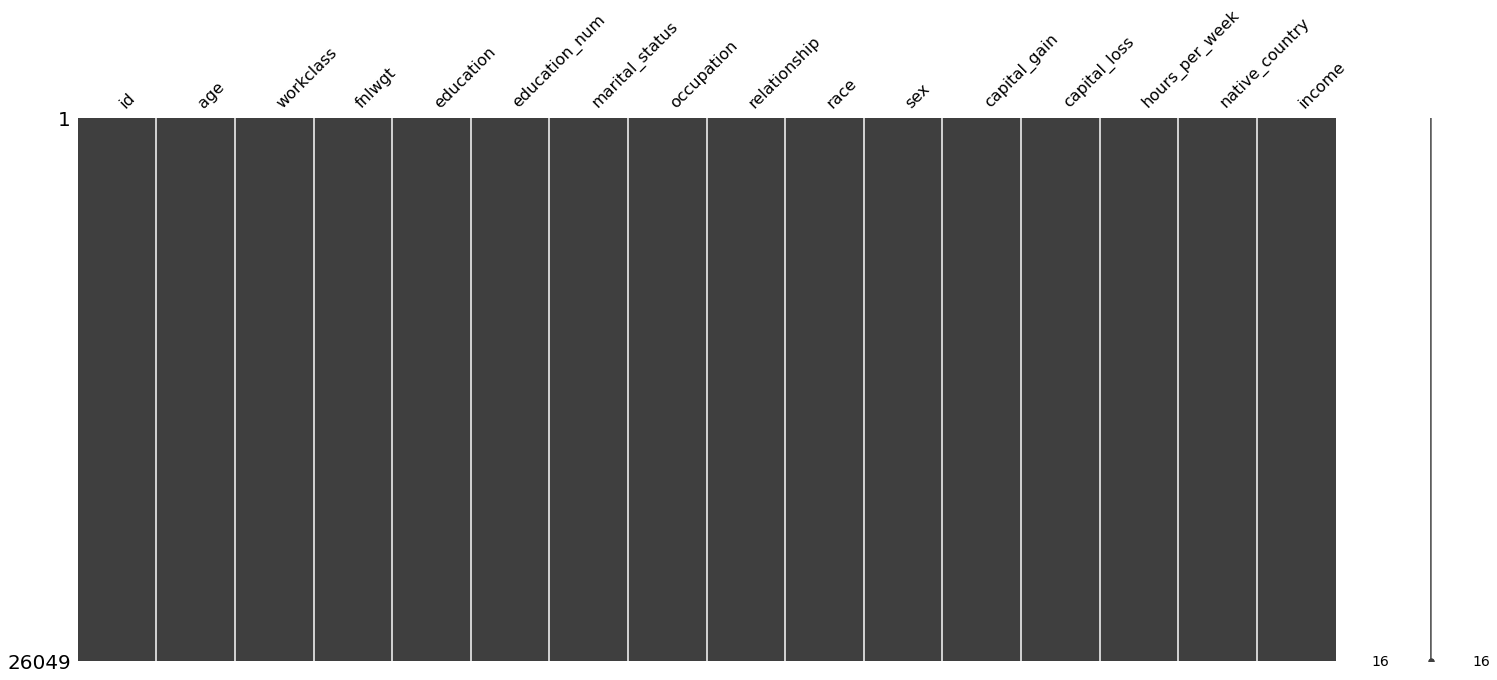

In [9]:
import missingno as msno
msno.matrix(train_data)

value_counts
시각화

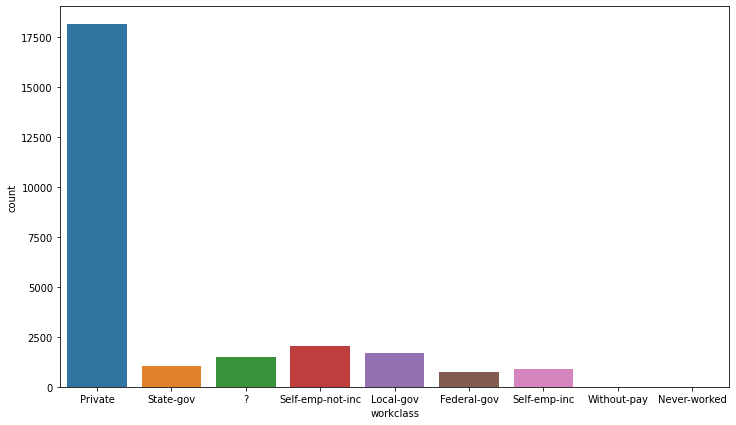

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(data=train_data, x='workclass', ax=ax)
plt.show()

인종도 백인이 더 많은 것을 혹인할 수 있다.

hue: 색상

hue='sex'

race(인종)의 **색상**을 sex(성별)로 **나누어서** 본다.

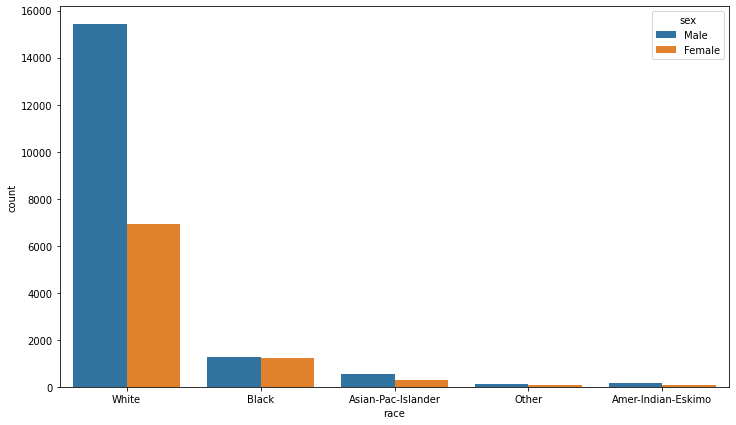

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
sns.countplot(data=train_data, x='race', ax=ax, hue='sex')
plt.show()

데이터의 각 feature는 다음과 같은 의미를 가지고 있습니다. (data description에서 제공)

* age : 나이
* workclass : 고용 형태
* fnlwgt : 사람 대표성을 나타내는 가중치 * (final weight의 약자)
* education : 교육 수준
* education_num : 교육 수준 수치
* marital_status: 결혼 상태
* occupation : 업종
* relationship : 가족 관계
* race : 인종
* sex : 성별
* capital_gain : 양도 소득
* capital_loss : 양도 손실
* hours_per_week : 주당 근무 시간
* native_country : 국적
* income : 수익 (예측해야 하는 값)

In [12]:
train_data.describe(include='O')

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
count,26049,26049,26049,26049,26049,26049,26049,26049,26049
unique,9,16,7,15,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,18123,8433,11970,3304,10541,22315,17482,23371,19744


describe을 사용하면 **수치형 데이터**의 다음 통계값을 추출할 수 있습니다.

* count : 개수
* mean : 평균
* std : 표준 편차
* min : 최솟값
* 25% : 제 1사분위값
* 50% : 중앙값, 중위값
* 75% : 제 3사분위값
* max : 최댓값


범주형 데이터의 경우 include='O'를 * 추가하여 확인할 수 있습니다.

In [13]:
for col in train_data.columns:
  if train_data[col].dtype == 'object':
    categories = train_data[col].unique()
    print(f'[{col}], ({len(categories)})')
    print('\n'.join(categories))
    print()

[workclass], (9)
Private
State-gov
?
Self-emp-not-inc
Local-gov
Federal-gov
Self-emp-inc
Without-pay
Never-worked

[education], (16)
HS-grad
9th
Some-college
Bachelors
11th
1st-4th
5th-6th
Assoc-acdm
10th
Prof-school
7th-8th
Masters
Assoc-voc
Doctorate
12th
Preschool

[marital_status], (7)
Married-civ-spouse
Never-married
Separated
Married-spouse-absent
Divorced
Widowed
Married-AF-spouse

[occupation], (15)
Sales
Machine-op-inspct
Other-service
Prof-specialty
Adm-clerical
Craft-repair
?
Handlers-cleaners
Farming-fishing
Exec-managerial
Transport-moving
Protective-serv
Tech-support
Priv-house-serv
Armed-Forces

[relationship], (6)
Husband
Own-child
Not-in-family
Unmarried
Wife
Other-relative

[race], (5)
White
Black
Asian-Pac-Islander
Other
Amer-Indian-Eskimo

[sex], (2)
Male
Female

[native_country], (41)
United-States
?
Mexico
Poland
Philippines
Puerto-Rico
Vietnam
Germany
Cuba
France
Ireland
El-Salvador
Guatemala
Haiti
Trinadad&Tobago
Jamaica
Canada
Taiwan
South
Columbia
Peru
Japan
D

## 데이터 분포를 살피기 위한 시각화

* 범주형: bar

* 수치형
  - 이산형: bar
  - 연속형: kdeplot, histogram

* 범주형 + 수치형: boxplot, violinplot, etc
* 수치형 + 수치형: scatter

> 이 외에도 다양한 방법이 존재한다.


### 범주형 데이터 분포

분포를 확인하기 전 범주형 feature의 unique한 범주 개수를 세어본다.


In [14]:
for col in train_data.columns:
  if train_data[col].dtype == 'object':
    categories = train_data[col].unique()
    print(f'[{col}] ({len(categories)})]')

[workclass] (9)]
[education] (16)]
[marital_status] (7)]
[occupation] (15)]
[relationship] (6)]
[race] (5)]
[sex] (2)]
[native_country] (41)]
[income] (2)]


workclass : 9개

education : 16개

marital_status : 7개

...

In [15]:
train_data['sex'].value_counts()

Male      17482
Female     8567
Name: sex, dtype: int64

seaborn

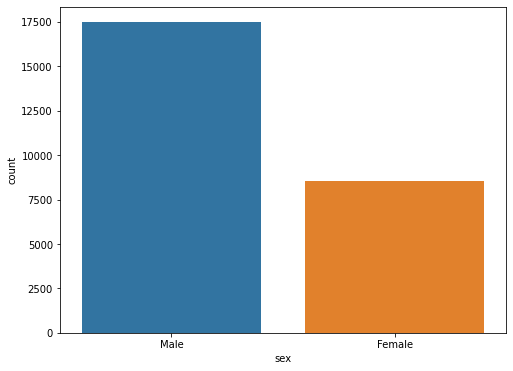

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='sex', data=train_data)

### Custom

- EDA의 핵심은 본인, 그리고 타인의 가독성을 생각하며 작성하는 것

- 여백, 축, 공간, 텍스트 등의 내용을 활용하면 됨


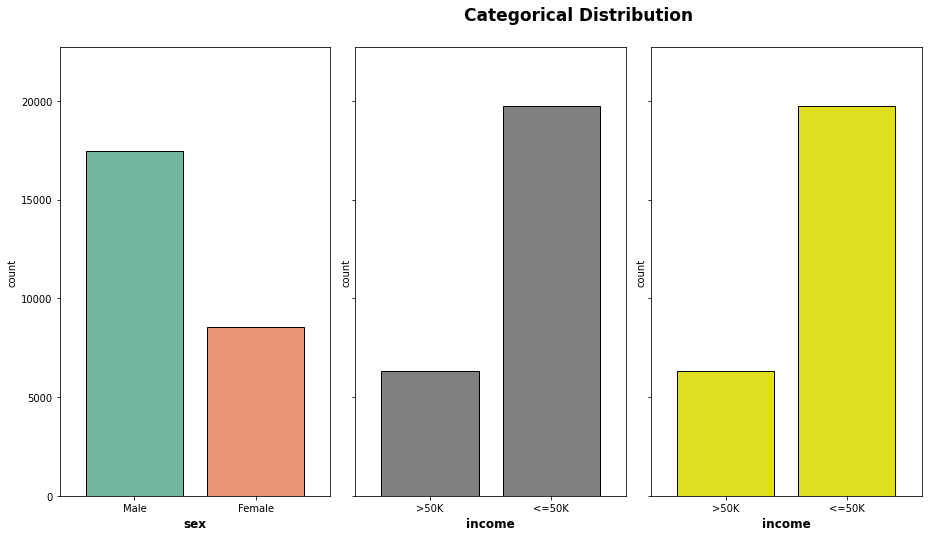

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(13, 7), sharey=True)

sns.countplot(x='sex', 
              data=train_data, 
              ax=axes[0],
              palette='Set2',
              edgecolor='black')

sns.countplot(x='income', 
              data=train_data, 
              ax=axes[1],
              color='gray',
              edgecolor='black')

# 위에 복제
sns.countplot(x='income', 
              data=train_data, 
              ax=axes[2],
              color='yellow',
              edgecolor='black')

# Margin & Label 조정
for ax in axes:
  ax.margins(.12, .15)
  ax.xaxis.label.set_size(12)
  ax.xaxis.label.set_weight('bold')

# figure title
plt.suptitle('Categorical Distribution',
             fontsize=17,
             fontweight='bold',
             x=.5,
             y=1.06,
             ha='left' # horizontal alignment
             )
plt.tight_layout()
plt.show()

* 남성과 여성의 비율 2:1 정도의 불균형

* 타겟값인 income도 약 3:1 정도의 불균형

인종과 국적도 어느정도 유사한 feature로 보인다.

하지만 미국 국적이 너무 많아 유의미한 시각적인 분석은 전처리를 거친 후 진행해야 할 것 같다.

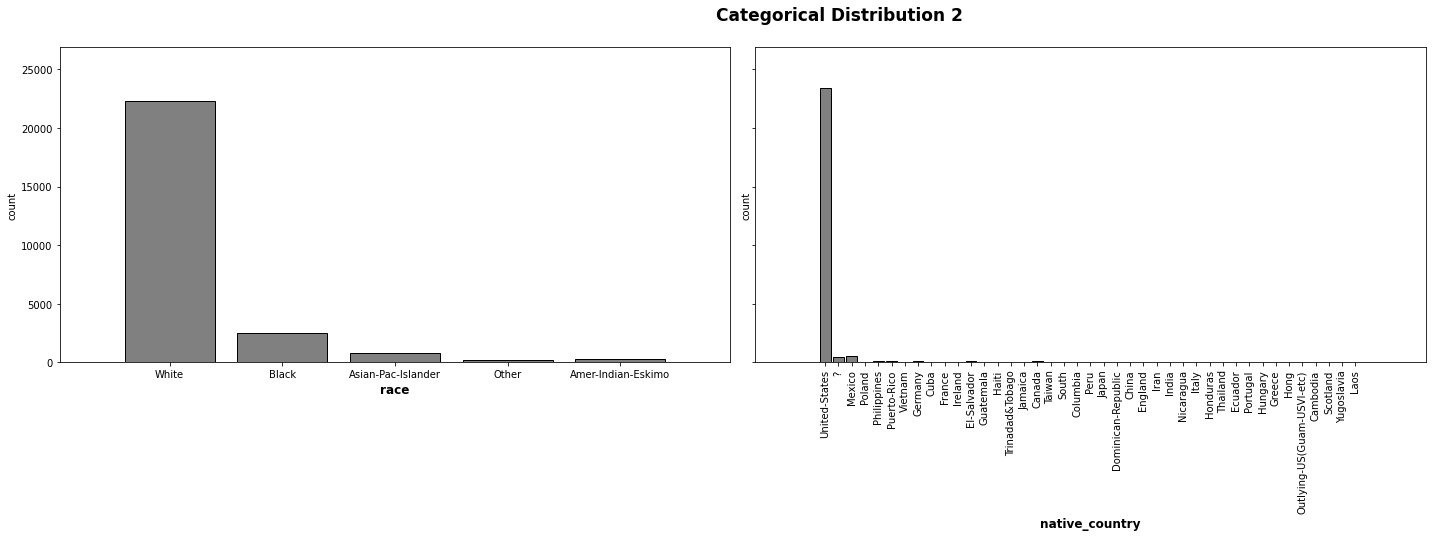

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

sns.countplot(x='race', data=train_data, ax=axes[0], color='gray', edgecolor='black')
sns.countplot(x='native_country', data=train_data, ax=axes[1], color='gray', edgecolor='black')

# Margin & label 조정
for ax in axes:
  ax.margins(.12, .15)
  ax.xaxis.label.set_size(12)
  ax.xaxis.label.set_weight('bold')

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=90)

# figure title

plt.suptitle('Categorical Distribution 2',
             fontsize=17,
             fontweight='bold',
             x=.5,
             y=1.06,
             ha='left'  # horizontal alignment
             )

plt.tight_layout()
plt.show()

이런 특성을 하나씩 살펴보며 후에 어떤 인코딩, 어떤 feature selection, feature engineering을 할 수 있을지 생각해보아야 한다.

비슷한 방식으로 `relationship`과 `marital_status`도 살펴볼 수 있다.

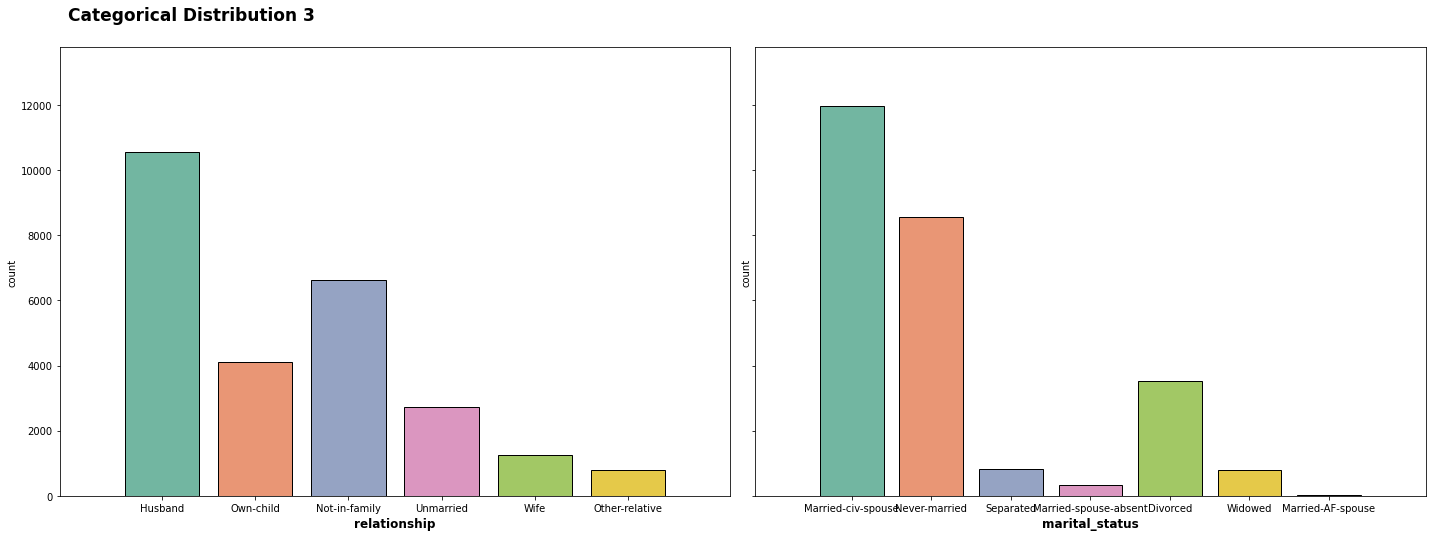

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)

sns.countplot(x='relationship',
              data=train_data,
              ax=axes[0],
              palette='Set2',
              edgecolor='black')

sns.countplot(x='marital_status',
              data=train_data,
              ax=axes[1],
              palette='Set2',
              edgecolor='black')

# Margin & Label 조정
for ax in axes:
  ax.margins(.12, .15)
  ax.xaxis.label.set_size(12)
  ax.xaxis.label.set_weight('bold')

# figure title
plt.suptitle('Categorical Distribution 3',
             fontsize=17,
             fontweight='bold',
             x=.05,
             y=1.06,
             ha='left'  # horizontal alignment
             )

plt.tight_layout()
plt.show()

둘의 **관계**를 살피는 것도 유의미할 것

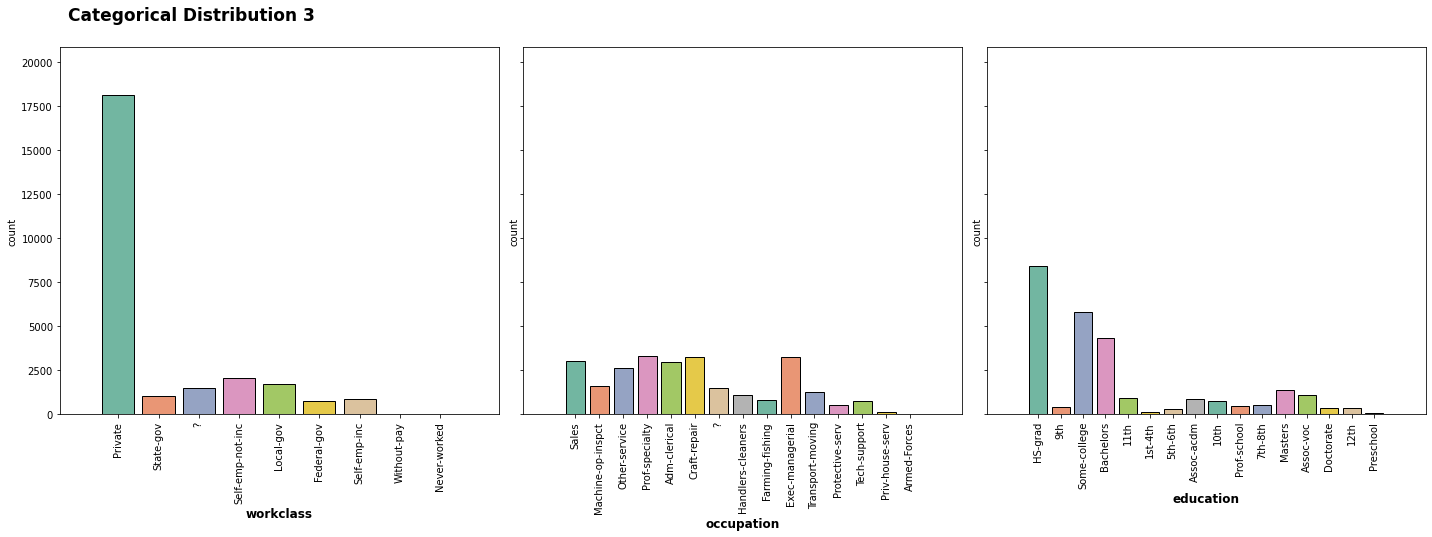

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

sns.countplot(x='workclass', data=train_data, ax=axes[0], palette='Set2', edgecolor='black')
sns.countplot(x='occupation', data=train_data, ax=axes[1], palette='Set2', edgecolor='black')
sns.countplot(x='education', data=train_data, ax=axes[2], palette='Set2', edgecolor='black')

# Margin & Label  조정
for idx, ax in enumerate(axes):
  ax.margins(.12, .15)
  ax.xaxis.label.set_size(12)
  ax.xaxis.label.set_weight('bold')
  # label의 rotation 변경
  plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=90)

#figure title
plt.suptitle('Categorical Distribution 3',
             fontsize=17,
             fontweight='bold',
             x=.05,
             y=1.06,
             ha='left' # horizontal alignment
             )
plt.tight_layout()
plt.show()

* education은 education_nun 순서가 유의미한 데이터로 축을 변경한다

* occupation의 경우, workclass와 연결할 수 있을 것 같다.

* education과 occupation은 영향이 있지 않을까?

다음과 같은 내용을 살펴보며 모델링에 신경써보자


## 수치형 데이터의 시각화

다음과 같은 수치형 데이터에서 일부만 살펴본다.

* age
* education_num
* capital_gain
* capital_loss
* hours_per_week
* fnlwgt

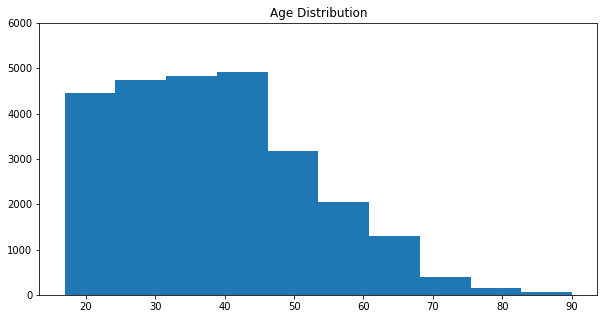

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.hist(train_data['age'], bins=10)
ax.set_ylim(0, 6000)
ax.set_title('Age Distribution')
plt.show()

인구조사인 만큼 17세부터 데이터가 시작하고 90세가 최고령임을 알 수 있다.
 45세 부근에서 수가 급격하게 줄어드는 것을 볼 수 있다.

나이는 어떤 식으로 인코딩하면 좋을까?
타이타닉 대회에서 사용하는 age_band로 나이 구간을 만들 수 있고, 다양한 방식을 생각해보자

---

나머지 데이터도 이런 방식으로 EDA 해보자.

* 더 깔끔하고
* 더 많은 내용을 담고
* 더 좋은 인사이트를 담는

EDA 노트북을 만들어 보는 것부터 데이터 분석의 시작.

